### Preparation 

For this homework you will use sigmoid as an activation function. Think about the following questions (you do not have to hand in the answers, they are just for your own recap)

- What is the purpose of an activation function in a NN in general?

- What's the advantage of e.g. sigmoid over the step function (threshold function)?

- How does sigmoid look like (the formula as well as the graph)?

- What is the derivative of sigmoid?

Implement a function sigmoid ( $\mathrm{x}$ ) and a function sigmoidprime ( $\mathrm{x}$ ) (the derivative. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

### Implementing the activation functions 

In [2]:
def sigmoid(x): 
    sig = 1 / (1 + np.exp(-x))
    return sig

In [3]:
def sigmoidprime(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

### data set and target values

The training data set will consist of possible inputs and their corresponding labels. We are training the network on logical gates (and, or, not and, not or, xor $==$ exclusive or). We will create the inputs and labels ourselves.

What are possible inputs to the logical gates?

For each of the logical gates you will need an array of labels $(=$ the true solution that the network is supposed to output), one corresponding to each input pair. ${ }^{2}$

${ }^{1}$ The logical gates take as input two binary digits (either 1 or 0 ), with all possible combinations there should be 4 input pairs. Put them in a $2 \mathrm{D}$ numpy array. (The shape of the array should be $(4,2))$

${ }^{2}$ You will need 5 arrays for each type of gate containing 4 binary digits $(0$ or 1 corresponding to the input)


In [4]:
# inputs
x = np.array([[0,0],[0,1],[1,0],[1,1]])

#targeted results
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

## Perceptron class

Our multilayer-Perceptron will consist of single Perceptrons. So we will need a class Perceptron.

Think about what a Perceptron consists of. ${ }^{3}$

When you create a Perceptron, it should receive an integer argument called input_units specifying how many weights are coming in to your Perceptron. In the beginning, random values should be assigned to the weights and the bias. ${ }^{4}$ Also assign the learning rate alpha $=1 .{ }^{5}$

The Perceptron should have a function forward_step(self, inputs) that calculates the activation of the perceptron. Use sigmoid as activation function.

Then you'll need a function update (self, delta) which updates the parameters. To do so, compute the gradients for weights and bias from the error term $\delta$. (This error term will be passed to the function when the backpropagation of the parent class MLP() is called - see next section.

Compute the gradients using:

$$
\frac{\partial L}{\partial w_{i j}^{(l)}}=\delta_{i}^{(l)} a_{j}^{(l-1)}
$$

And then update the parameters using:

$$
\theta_{\text {new }}=\theta_{\text {old }}-\alpha \nabla L_{\theta}
$$

${ }^{3}$ weights and a bias

${ }^{4}$ you can use np.random.randn() for that

${ }^{5}$ All of this happens in the _init_. function. Make sure you define weights, bias, alpha with self. in the beginning so they can be accessed in all functions of the class.



In [5]:
class Perceptron:
    
    """have to write a doc string defining the purpose of the class and attributes"""
    
    
    def __init__(self,input_units): 
        
        #setting the input unit to the calss
        self.input_units = input_units
        
        # initializing random weights(w) to all inputs(x), weights should be as many as inputs 
        self.weight = np.random.randn(input_units)
        
        # its a single perceptron, so should have a single random bias. 
        self.bias = np.random.randn()
        
        #learning rate
        self.alpha = 1
        
    def forward_step(self, inputs): 
        
        """takes the input, have the bias from the class, calculates the weighted sum(intup x weights) + bias,
        Puts it through the activation function and decides on the output"""
        
        # set the input
        self.input = inputs
        
        #calculates the weighted sum|||  weight = ( WX + b )  
        self.weighted_sum = self.weight @ inputs  + self.bias 
        
        # puts it through activation function sigma(weight)
        self.activation = sigmoid(self.weighted_sum)
        
        # returns the output 
        return self.activation
    
    
    def update(self, delta):
        
        
        """update the weights  and bias both according to the values and learning rate"""
        
        # setting the delta. (it will come from backpropagation)
        self.delta = delta
        
        # gradiant (▽ L)  = delt_of_the_next_nuron * output_of_corrospoding_nuron 
        gradiant =  delta * self.input
        
        # updating the weights ==>  learning_rate *  gradiant
        self.weight -= self.alpha * gradiant
        
        # updating the bias
        #self.bias -= self.alpha * delta 
        
    

## MLP

Further, we will need a class MLP() that can perform a forward and backprop-step. Initialize the MLP with $\mathbf{1}$ hidden layer that has $\mathbf{4}$ Perceptrons. Initialize $\mathbf{1}$ output neuron$ { }^{7}$. Define the following functions of the class:

- In the forward_step the inputs are passed through the network. ${ }^{8}$

- In the backprop_step the parameters of the network are updated. ${ }^{9}$


${ }^{7}$ It might make sense to also initialize a variable self. output to store the output.

${ }^{8}$ First compute the activations for the hidden layer. (You might need to reshape the resulting array to feed it to the output neuron. Check np.reshape (arr, newshape $=(-1))$.)

Then feed the activations of the hidden laver into the output laver. Store it in self. output.

${ }^{9}$ That means, update the weights and the biases of the output neuron (first) and neurons in the hidden layers (afterwards). For that, first compute the error term $\delta$ using this formula:

$$
\delta_{i}^{(l)}=\left\{-\left(t_{i}-y_{i}\right) \sigma^{\prime}\left(d_{i}^{(N)}\right) \text { if } l=N,\left(\sum_{k=1}^{m} \delta_{k}^{(l+1)} w_{k i}^{(+1)}\right) \sigma^{\prime}\left(d_{i}^{(l)}\right)\right. \text { else. }
$$

Then call the update (self, delta) function of the respective neuron and hand the delta over.

(This is just a suggestion, there might be different solutions.)


In [6]:
class MLP():
    def __init__(self):
        # initialize 1 hidden layer with 4 perceptrons
        self.h_layer = [Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)]
        
        # initialize the output neuron 4 types of combination 
        self.out_neuron = Perceptron(4)
        
        # initialize a variable self.output to store the output
        self.output = 0
    
    def forward_step(self, inputs):
        
        # create an empty list
        activations = []
        
        # first compute the activation for every perceptron in hidden layer iteratively      
        for perceptron in self.h_layer:
            # send the input to perceptron and runa ctivation. Then store the values in the activations list
            collect_activation = perceptron.forward_step(inputs)
            activations.append(collect_activation)
        
        # convert the activations list into an array
        activaitons = np.array(activations)
        
        # reshape the resulting array to feed it to the output neuron ?? get back ??
        activations = np.reshape(activations, newshape = (-1))
        
        # feed the activations of the hidden layer into the output layer "AND" store it in self.output
        self.output = self.out_neuron.forward_step(activations)
        
    
    def backprop_step(self, inputs, target):
        
        ## step 1: output neurons (layer == N) 
        
        # get the delta for the output neuron, formula delta(output) = p'(s)(y-t)
        delta_output = (self.output - target) * sigmoidprime(self.out_neuron.weighted_sum)
        
        # update
        self.out_neuron.update(delta_output)
        
        ## Step 2: hidden neurons

        # an empty list for storing the delta values of the hidden layer
        delta_h = []
        # for each perceptron in the hidden layer, formula: delta(hidden) = p'(s) * delta j * sum(w i)
        for i, p in enumerate(self.h_layer):
            
            # compute the delta value and add it to the list (first itter = calculate the output nurons delta) 
            collect_delta = delta_output * sigmoidprime(p.weighted_sum) * self.out_neuron.weight[i]
            
            delta_h.append(collect_delta)
            # update the delta for the next(backward) nuron
            p.update(delta_h[i])
     

## Training

As a loss function for training, we will use the squared error $(t-y)^{2}$. This loss is the sigmoid output vs. the target (=label in dataset). But as discussed in the lecture, we want to introduce an additional measurement of the performance of the network: This is the accuracy measure. While the loss compares the distance of our network to the ground truth, the accuracy makes a less qualitative statement about the performance of our network, but quantitatively tells us how our network is doing. To do so, we introduce a threshold, in our case we use $0.5$ and define that if the network outputs a value bigger than $0.5$ and the target is 1 , it counts as a correct classification. If target is 0 a correct classification will be a value smaller than $0.5$ respectively. The accuaracy is then defined as the ratio of correct classification vs total classifications performed

The training procedure thus should consist of the following steps:

1. Create an instance of an MLP class.

2. Train the instance for 1000 epochs.

a) In each epoch, loop over each point in your dataset once.

i. For each data point, perform a forward and a backward step.

ii. Record the accuracy and the loss for each point.

For the purpose of visualization and also to monitor the performance of your network, you should keep track of the epochs and the average loss and accuracy for each epoch.

In [9]:
#instance of the MLP class
mlp = MLP()

# initialize list to store performance
accuracies = []
losses = []
epochs = []

threshold = 0.5

# train for 1000 epochs
epoch = 1000
for i in range(epoch):
    # keep track of the steps
    epochs.append(i)
    
    my_accuracy = 0
    my_loss = 0
    
    for n in range(4):
        
        input = x[n]
        target = t_xor[n]
        
        mlp.forward_step(input)
        mlp.backprop_step(input, target)
        
        
        # checking if the output and target matches
        my_accuracy += int(int(mlp.output >= threshold) == target)
        
        # Square error = (t-y)^2 --> here we only calculate the error part
        my_loss += (target - mlp.output) ** 2
        
        
        
    
    accuracy = my_accuracy/4
    accuracies.append(accuracy)
    losses.append(my_loss/4)
    
  

## Visualization

  Visualize the training progress using matplotlib. Create one graph with the epochs on the $x$-axis and the average loss per epoch on the $y$-axis. Do the same for the average accuracy per epoch.

If your MLP trained correctly, the loss should come down to zero and the accuracy should go up to 1 in most cases. Due to random weight initialization the accuracy might not reach 1 sometimes. In that case just rerun the MLP initialization and the training. 

Text(0, 0.5, 'loss')

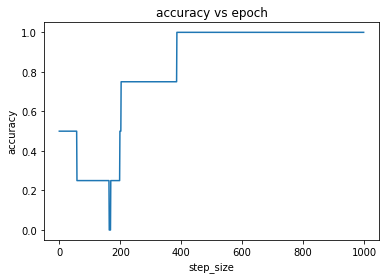

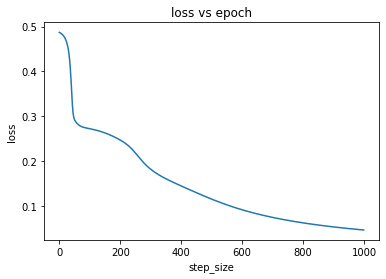

In [14]:
plt.figure()


plt.title("accuracy vs epoch")
plt.plot(epochs,accuracies)
plt.xlabel("step_size")
plt.ylabel("accuracy")



plt.figure()

plt.title("loss vs epoch")
plt.plot(epochs,losses)
plt.xlabel("step_size")
plt.ylabel("loss")